  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Earliest year of data is 2000
Last year of data is 2015
There are 6 countries in this dataset and 96 rows
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


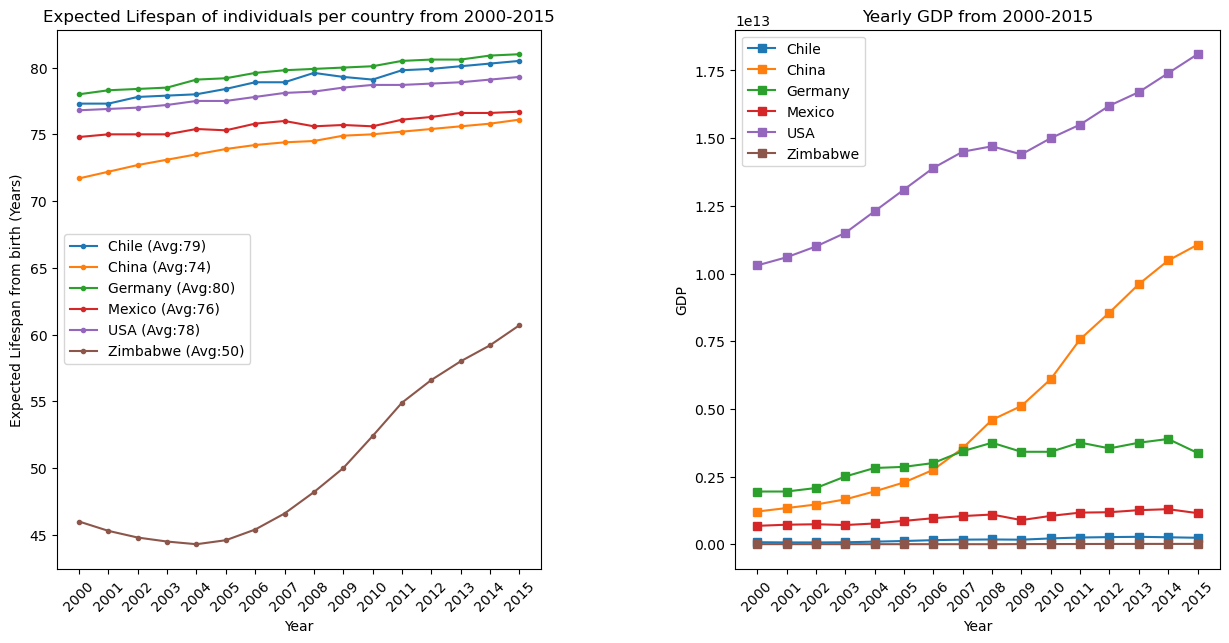

<Figure size 640x480 with 0 Axes>

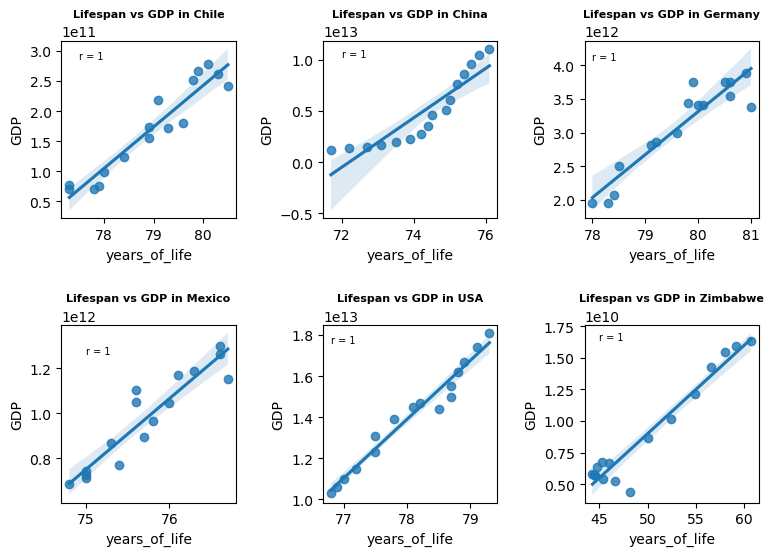

<Figure size 640x480 with 0 Axes>

In [12]:
#GDP Project scope
    #how countries compare with gdp and life expectancy - complete
    #life expectancy over all countries from 2000 - 2015 - complete 
    #investigate any outliers if any - zimbabwe life expectancy very low
    # Average life expectancy per country from 2000-2015 - 
    #correlate gdp to life expectancy - 

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

gdp = pd.read_csv("gdp_all_data.csv")

#checking columns
print(gdp.head())

#simplifying life expectancy column
gdp = gdp.rename({'Life expectancy at birth (years)':'years_of_life'}, axis = 'columns')

#checking timeframe
print("Earliest year of data is " + str(min(gdp.Year)))
print("Last year of data is " + str(max(gdp.Year)))

#how many countries?
print("There are " + str(len(gdp.Country.unique())) + ' countries in this dataset' + ' and ' + str(len(gdp)) + ' rows')
print(gdp.Country.unique())

###compare life expectancies & GDP over time between countries on line graphs###

#creating lists of life expectancy per country per year
chile_years = gdp.years_of_life[(gdp['Country'] == 'Chile')]
#print(chile_years)
china_years = gdp.years_of_life[(gdp['Country'] == 'China')]
germany_years = gdp.years_of_life[(gdp['Country'] == 'Germany')]
mexico_years = gdp.years_of_life[(gdp['Country'] == 'Mexico')]
usa_years = gdp.years_of_life[(gdp['Country'] == 'United States of America')]
zimbabwe_years = gdp.years_of_life[(gdp['Country'] == 'Zimbabwe')]

#average life expectancy per country
chile_avg = round(np.mean(chile_years))
china_avg = round(np.mean(china_years))
germany_avg = round(np.mean(germany_years))
mexico_avg = round(np.mean(mexico_years))
usa_avg = round(np.mean(usa_years))
zimbabwe_avg = round(np.mean(zimbabwe_years))


year_range = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
#print(year_range)

#creating lists of GDP per country per year
chile_GDP = gdp.GDP[(gdp['Country'] == 'Chile')]
#print(chile_GDP)
china_GDP = gdp.GDP[(gdp['Country'] == 'China')]
germany_GDP = gdp.GDP[(gdp['Country'] == 'Germany')]
mexico_GDP = gdp.GDP[(gdp['Country'] == 'Mexico')]
usa_GDP = gdp.GDP[(gdp['Country'] == 'United States of America')]
zimbabwe_GDP = gdp.GDP[(gdp['Country'] == 'Zimbabwe')]

#average gdp per country
chile_gdp_avg = round(np.mean(chile_GDP))
china_gdp_avg = round(np.mean(china_GDP))
germany_gdp_avg = round(np.mean(germany_GDP))
mexico_gdp_avg = round(np.mean(mexico_GDP))
usa_gdp_avg = round(np.mean(usa_GDP))
zimbabwe_gdp_avg = round(np.mean(zimbabwe_GDP))

plt.figure(figsize=(15,7))

ax1 = plt.subplot(1,2,1)
plt.plot(year_range, chile_years, label = 'Chile', marker = '.')
plt.plot(year_range, china_years, label = 'China', marker = '.')
plt.plot(year_range, germany_years, label = 'Germany', marker = '.')
plt.plot(year_range, mexico_years, label = 'Mexico', marker = '.')
plt.plot(year_range, usa_years, label = 'USA', marker = '.')
plt.plot(year_range, zimbabwe_years, label = 'Zimbabwe', marker = '.')

plt.xlabel('Year')
plt.ylabel('Expected Lifespan from birth (Years)')
plt.title('Expected Lifespan of Individuals per Country from 2000-2015')
ax1.set_xticks(year_range)
plt.xticks(rotation=45)
#Customizing legend to show average of life expectancy next to country#
plt.legend(['Chile (Avg:'+str(chile_avg)+')','China (Avg:'+str(china_avg)+')','Germany (Avg:'+str(germany_avg)+')',
            'Mexico (Avg:'+str(mexico_avg)+')','USA (Avg:'+str(usa_avg)+')','Zimbabwe (Avg:'+str(zimbabwe_avg)+')'])

ax2 = plt.subplot(1,2,2)
plt.plot(year_range, chile_GDP, label = 'Chile', marker = 's')
plt.plot(year_range, china_GDP, label = 'China', marker = 's')
plt.plot(year_range, germany_GDP, label = 'Germany', marker = 's')
plt.plot(year_range, mexico_GDP, label = 'Mexico', marker = 's')
plt.plot(year_range, usa_GDP, label = 'USA', marker = 's')
plt.plot(year_range, zimbabwe_GDP, label = 'Zimbabwe', marker = 's')

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Yearly GDP from 2000-2015')
ax2.set_xticks(year_range)
plt.xticks(rotation=45)
plt.legend()
#plt.legend(['Chile (Avg:'+str(chile_gdp_avg)+')','China (Avg:'+str(china_gdp_avg)+')','Germany (Avg:'+str(germany_gdp_avg)+')',
            #'Mexico (Avg:'+str(mexico_gdp_avg)+')','USA (Avg:'+str(usa_gdp_avg)+')','Zimbabwe (Avg:'+str(zimbabwe_gdp_avg)+')'])

plt.subplots_adjust(wspace=0.4)

plt.show()
plt.clf()

### Showing relationship between GDP and Life expectancy ###
## Correlation coefficients per country ##
Chile_corr = round(np.corrcoef(chile_years,chile_GDP)[0,1])
China_corr = round(np.corrcoef(china_years,china_GDP)[0,1])
Germany_corr = round(np.corrcoef(germany_years,germany_GDP)[0,1])
Mexico_corr = round(np.corrcoef(mexico_years,mexico_GDP)[0,1])
USA_corr = round(np.corrcoef(usa_years,usa_GDP)[0,1])
Zimbabwe_corr = round(np.corrcoef(zimbabwe_years,zimbabwe_GDP)[0,1])

plt.figure(figsize=(9,6))

ay1=plt.subplot(2,3,1)
sns.regplot(x=chile_years, y=chile_GDP)
plt.text(77.5, 3e11, "r = " + str(Chile_corr), verticalalignment='top', fontsize=7)
plt.title('Lifespan vs GDP in Chile', fontsize = 8, fontweight = 'bold')

ay2=plt.subplot(2,3,2)
sns.regplot(x=china_years, y=china_GDP)
plt.text(72, 1.1e13, "r = " + str(China_corr), verticalalignment='top', fontsize=7)
plt.title('Lifespan vs GDP in China', fontsize = 8, fontweight = 'bold')

ay3=plt.subplot(2,3,3)
sns.regplot(x=germany_years, y=germany_GDP)
plt.text(78, 4.2e12, "r = " + str(Germany_corr), verticalalignment='top', fontsize=7)
plt.title('Lifespan vs GDP in Germany', fontsize = 8, fontweight = 'bold')

ay4=plt.subplot(2,3,4)
sns.regplot(x=mexico_years, y=mexico_GDP)
plt.text(75, 1.3e12, "r = " + str(Mexico_corr), verticalalignment='top', fontsize=7)
plt.title('Lifespan vs GDP in Mexico', fontsize = 8, fontweight = 'bold')

ay5=plt.subplot(2,3,5)
sns.regplot(x=usa_years, y=usa_GDP)
plt.text(76.8, 1.8e13, "r = " + str(USA_corr), verticalalignment='top', fontsize=7)
plt.title('Lifespan vs GDP in USA', fontsize = 8, fontweight = 'bold')

ay6=plt.subplot(2,3,6)
sns.regplot(x=zimbabwe_years, y=zimbabwe_GDP)
plt.text(45, 1.70e10, "r = " + str(Zimbabwe_corr), verticalalignment='top', fontsize=7)
plt.title('Lifespan vs GDP in Zimbabwe', fontsize = 8, fontweight = 'bold')

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.6)
plt.show()
plt.clf()

### Conclusions from comparing GDP vs Lifespans in 6 countries from 2000-2015


Some conclusions reached after comparing 6 countries GDPs and their expected citizens lifespans are:<br>
1.) There is a positive correlation between GDP and lifespan of people<br>
2.) It was curious to find that although GDPs between countries might be similar, that does not mean their expected lifespans are.<br>
3.) For instance, Chile and Zimbabwe have historically had similar overall GDP and growth, yet Zimbabwes citizens live 30 years less than Chile citizens on average.<br>
4.) In looking into why Zimbabwes life expectancy is so low, the combination of HIV/AIDS epdiemic in the country with a lack of access to health care hinders the countries ability to provide longevity for its people.<br>
5.) Because GDP does not represent how the country is allocating resources, one could surmise that if a country's expected lifespan is low compared to another country and their GDPs are similar, the country with a lower lifespan is experiencing turmoil and/or corruption at some level.<br> 
6.) Due to Zimbabwe's [economic_collapse](https://pmc.ncbi.nlm.nih.gov/articles/PMC6070968/#:~:text=In%20the%202000s%2C%20the%20economy,abroad%20each%20year%20%5B6%5D.) starting in 2000, many sector's of the country was affected, contributing to the lifespan that we see during this time period.

